<a href="https://colab.research.google.com/github/mrdbourke/zero-to-mastery-ml/blob/master/section-4-unstructured-data-projects/end-to-end-dog-vision-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to TensorFlow, Deep Learning and Transfer Learning (work in progress)

* **Project:** Dog Vision 🐶👁 - Using computer vision to classify dog photos into different breeds.
* **Goals:** Learn TensorFlow, deep learning and transfer learning.
* **Domain:** Computer vision.
* **Data:** Images of dogs from [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) (120 dog breeds, 20,000+ images).
* **Problem type:** Multi-class classification (120 different classes).

Welcome, welcome!

The focus on this notebook is to give a quick overview of deep learning with TensorFlow.

How?

We're going to go through the machine learning workflow steps and build a computer vision project to classify photos of dogs into their respective dog breed.

TK - image of workflow - e.g. dog photo -> model -> dog breed

In [2]:
# Quick timestamp
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2023-11-03 01:43:39.999560


## TK - What we're going to cover

In this project, we're going to be introduced to the power of deep learning and more specifically, transfer learning using TensorFlow.

We'll go through each of these in the context of the [6 step machine learning framework](https://dev.mrdbourke.com/zero-to-mastery-ml/a-6-step-framework-for-approaching-machine-learning-projects/):

1. **Problem defintion** - Use computer vision to classify photos of dogs into different dog breeds.
2. **Data** - 20,000+ images of dogs from 120 different dog breeds from the [Stanford Dogs dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/).
3. **Evaluation** - We'd like to beat the original paper's results (22% mean accuracy across all classes).
  * **Tip:** A good way to practice your skills is to find some results online and try to beat them.
4. **Features** - Because we're using deep learning, our model will learn the features on its own.
5. **Modelling** - We're going to use a pretrained convolutional neural network (CNN) and transfer learning.
6. **Experiments** - We'll try different amounts of data with the same model to see the effects on our results.

> **Note:** It's okay not to know these exact steps ahead of time. When starting a new project, it's often the case you'll figure it out as you go. These steps are only filled out because I've had practice working on several machine learning projects. You'll pick up these ideas overtime.


## TK - Table of contents

* Problem type (e.g. multi-class classification)
* Domain (e.g. computer vision)
* Data type (e.g. unstructured vs structured)

# Problem Defintion





# Data



# Evaluation



# Features



# Modelling



# Experiments

## TK - Where can can you get help?

All of the materials for this course [live on GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/tree/master).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/zero-to-mastery-ml/discussions) there too.

## Quick definitions

Let's start by breaking down some of the most important topics we're going to go through.

### TK - What is TensorFlow?

[TensorFlow](https://www.tensorflow.org/) is an open source machine learning and deep learning framework originally developed by Google.

### TK - Why use TensorFlow?

TensorFlow allows you to manipulate data and write deep learning algorithms using Python code.

It also has several built-in capabilities to leverage accelerated computing hardware (e.g. GPUs, Graphics Processing Units and TPUs, Tensor Processing Units).

Many of world's largest companies [power their machine learning workloads with TensorFlow](https://www.tensorflow.org/about/case-studies).

### TK - What is deep learning?

[Deep learning](https://en.wikipedia.org/wiki/Deep_learning) is a form of machine learning where data passes through a series of progressive layers which all contribute to learning an overall representation of that data.

The series of progressive layers combines to form what's referred to as a [**neural network**](https://en.wikipedia.org/wiki/Artificial_neural_network).

For example, a photo may be turned into numbers and those numbers are then manipulated mathematically through each progressive layer to learn patterns in the photo.

The "deep" in deep learning comes from the number of layers used in the neural network.

So when someone says deep learning or (artificial neural networks), they're typically referring to same thing.

### TK - What can deep learning be used for?

Deep learning is such a powerful technique that new use cases are being discovered everyday.

Most of the modern forms of artifical intelligence (AI) applications you see, are powered by deep learning.

[ChatGPT](https://chat.openai.com) uses deep learning to process text and return a response.

Tesla's [self-driving cars use deep learning](https://www.tesla.com/AI) to power their computer vision systems.

Apple's Photos app uses deep learning to [recognize faces in images](https://machinelearning.apple.com/research/recognizing-people-photos) and create Photo Memories.

[Nutrify](https://nutrify.app) (an app my brother and I build) uses deep learning to recognize food in images.

TK - image of examples

### TK - What is transfer learning?

[Transfer learning](https://en.wikipedia.org/wiki/Transfer_learning) is one of the most powerful and useful techniques in modern AI and machine learning.

It involves taking what one model (or neural network) has learned in a similar domain and applying to your own.

In our case, we're going to use transfer learning to take the patterns a neural network has learned from the 1 million+ images and over 1000 classes in [ImageNet](https://www.image-net.org/) (a gold standard computer vision benchmark) and apply them to our own problem of recognizing dog breeds.

The biggest benefit of transfer learning is that it often allows you to get outstanding results with less data and time.

TK - Transfer learning workflow - Large data -> Large model -> Patterns -> Custom data -> Custom model

## TK - Getting setup

This section of the course is taught with Google Colab, an online Jupyter Notebook that provides free access to GPUs (Graphics Processing Units, we'll hear more on these later).

For a quick rundown on how to use Google Colab, see their [introductory guide](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) (it's quite similar to a Jupyter Notebook with a few different options).

Google Colab also comes with many data science and machine learning libraries, including TensorFlow, pre-installed.

### Getting a GPU

Before running any code, we'll make sure our Google Colab instance is connected to a GPU.

You can do this via going to Runtime -> Change runtime type -> GPU (this may restart your existing runtime).

Why use a GPU?

Since neural networks perform a large amount of calculations behind the scenes (the main one being matrix multiplication), you need a computer chip that perform these calculations quickly, otherwise you'll be waiting all day for a model to train.

And in short, GPUs are much faster at performing matrix multiplications than CPUs.

Why this is the case is behind the scope of this project (you can search "why are GPUs faster than CPUs for machine learning?" for more).

The main thing to remember is: generally, in deep learning, GPUs = faster than CPUs.

> **Note:** A good experiment would be to run the neural networks we're going to build later on with and without a GPU and see the difference in their training times.

Ok, enough talking, let's start by importing TensorFlow!

We'll do so using the common abbreviation `tf`.

In [3]:
import tensorflow as tf
tf.__version__

'2.14.0'

Nice!

> **Note:** If you want to run TensorFlow locally, you can follow the [TensorFlow installation guide](https://www.tensorflow.org/install).

Now let's check to see if TensorFlow has access to a GPU (this isn't 100% required to complete this project but will speed things up dramatically).

We can do so with the method [`tf.config.list_physical_devices()`](https://www.tensorflow.org/api_docs/python/tf/config/list_physical_devices).

In [8]:
# Do we have access to a GPU?
device_list = tf.config.list_physical_devices()
if "GPU" in [device.device_type for device in device_list]:
  print(f"[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be sped up!")
  print(f"[INFO] Accessible devices:\n{device_list}")
else:
  print(f"[INFO] TensorFlow does not have GPU available to use. Models may take a while to train.")
  print(f"[INFO] Accessible devices:\n{device_list}")

[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be sped up.
[INFO] Accessible devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# TK - Getting Data

There are several options and locations to get data for a deep learning project.

| Resource | Description |
|----------|-------------|
| [Kaggle Datasets](https://www.kaggle.com/datasets) | A collection of datasets across a wide range of topics. |
| [TensorFlow Datasets](https://www.tensorflow.org/datasets) | A collection of ready-to-use machine learning datasets ready for use under the `tf.data.Datasets` API. You can see a list of [all available datasets](https://www.tensorflow.org/datasets/catalog/overview#all_datasets) in the TensorFlow documentation. |
| [Hugging Face Datasets](https://huggingface.co/datasets) | A continually growing resource of datasets broken into several different kinds of topics. |
| [Google Dataset Search](https://datasetsearch.research.google.com/) | A search engine by Google specifically focused on searching online datasets. |
| Original sources | Datasets which are made available by researchers or companies with the release of a product or research paper (sources for these will vary, they could be a link on a website or a link to an application form). |
| Custom datasets | These are datasets comprised of your own custom source of data. You may build these from scratch on your own or have access to them from an existing product or service. For example, your entire photos library could be your own custom dataset or your entire notes and documents folder or your company's custom order history. |

In our case, the dataset we're going to use is called the Stanford Dogs dataset (or ImageNet dogs, as the images are dogs separated from ImageNet).

Because the Stanford Dogs dataset has been around for a while (since 2011, which as of writing this in 2023 is like a lifetime in deep learning), it's available from several resources:

* The [original project website](http://vision.stanford.edu/aditya86/ImageNetDogs/) via link download
* Inside [TensorFlow datasets under `stanford_dogs`](https://www.tensorflow.org/datasets/catalog/stanford_dogs)
* On [Kaggle as a downloadable dataset](https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset)

The point here is that when you're starting out with practicing deep learning projects, there's no shortage of datasets available.

However, when you start wanting to work on your own projects or within a company environment, you'll likely start to work on custom datasets (datasets you build yourself or aren't available publicly online).

The main difference between existing datasets and custom datasets is that existing datasets often come preformatted and ready to use.

Where as custom datasets often require some preprocessing before they're ready to use within a machine learning project.

To practice formatting a dataset for a machine learning problem, we're going to download the Stanford Dogs dataset from the original website.

Before we do so, the following code is an example of how we'd get the Stanford Dogs dataset from TensorFlow Datasets.

In [1]:
# Download the dataset into train and test split using TensorFlow Datasets
# import tensorflow_datasets as tfds
# ds_train, ds_test = tfds.load('stanford_dogs', split=['train', 'test'])

### TK - Download data directly from Stanford Dogs website

Our overall project goal is to build a computer vision model which performs better than the original Stanford Dogs paper (average of 22% accuracy per class across 120 classes).

To do so, we need some data.

Let's download the original Stanford Dogs dataset from the project website.

The data comes in three main files:

1. [Images](http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar) (757MB) - `images.tar`
3. [Annotations](http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar) (21MB) - `annotation.tar`
3. [Lists](http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar), with train/test splits (0.5MB) - `lists.tar`

Our goal is to get a file structure like this:

```
dog_vision_data/
    images.tar
    annotation.tar
    lists.tar
```

> **Note:** If you're using Google Colab for this project, remember that any data uploaded to the Google Colab session gets deleted if the session disconnects. So to save us redownloading the data every time, we're going to download it once and save it to Google Drive.
>
> **Resource:** For a good guide on getting data in and out of Google Colab, see the [Google Colab `io.ipynb` tutorial](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH).

To make sure we don't have to keep redownloading the data every time we leave and come back to Google Colab, we're going to:

1. Download the data if it doesn't already exist on Google Drive.
2. Copy it to Google Drive (because Google Colab connects nicely with Google Drive) if it isn't already there.
3. If the data already exists on Google Drive (we've been through steps 1 & 2), we'll import it instead.

There are two main options to connect Google Colab instances to Google Drive:

1. Click "Mount Drive" in "Files" menu on the left.
2. Mount programmatically with `from google.colab import drive` -> `drive.mount('/content/drive')`.

More specifically, we're going to follow the following steps:

1. Mount Google Drive.
2. Setup constants such as our base directory to save files to, the target files we'd like to download and target URL we'd like to download from.
3. Setup our target local path to save to.
4. Check if the target files all exist in Google Drive and if they do, copy them locally.
5. If the target files don't exist in Google Drive, download them from the target URL with the [`!wget`](https://www.gnu.org/software/wget/manual/wget.html) command.
6. Create a file on Google Drive to store the download files.
7. Copy the downloaded files to Google Drive for use later if needed.

A fair few steps, but nothing we can't handle!

Plus, this is all good practice for dealing with and manipulating data, a very important skill in the machine learning engineers toolbox.

In [4]:
from pathlib import Path
from google.colab import drive

# 1. Mount Google Drive (this will bring up a pop-up to sign-in/authenticate)
# Note: This step is specifically for Google Colab, if you're working locally, you may need a different setup
drive.mount("/content/drive")

# 2. Setup constants
# Note: For constants like this, you'll often see them created as variables with all capitals
TARGET_DRIVE_PATH = Path("drive/MyDrive/tensorflow/dog_vision_data")
TARGET_FILES = ["images.tar", "annotation.tar", "lists.tar"]
TARGET_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs"

# 3. Setup local path
local_dir = Path("dog_vision_data")

# 4. Check if the target files exist in Google Drive, if so, copy them to Google Colab
if all((TARGET_DRIVE_PATH / file).is_file() for file in TARGET_FILES):
  print(f"[INFO] Copying Dog Vision files from Google Drive to local directory...")
  print(f"[INFO] Source dir: {TARGET_DRIVE_PATH} -> Target dir: {local_dir}")
  !cp -r {TARGET_DRIVE_PATH} .
  print("[INFO] Good to go!")

else:
  # 5. If the files don't exist in Google Drive, download them
  print(f"[INFO] Target files not found in Google Drive.")
  print(f"[INFO] Downloading the target files... this shouldn't take too long...")
  for file in TARGET_FILES:
    # wget is short for "world wide web get", as in "get a file from the web"
    # -nc or --no-clobber = don't download files that already exist locally
    # -P = save the target file to a specified prefix, in our case, local_dir
    !wget -nc {TARGET_URL}/{file} -P {local_dir} # the "!" means to execute the command on the command line rather than in Python

  print(f"[INFO] Saving the target files to Google Drive, so they can be loaded later...")

  # 6. Ensure target directory in Google Drive exists
  TARGET_DRIVE_PATH.mkdir(parents=True, exist_ok=True)

  # 7. Copy downloaded files to Google Drive (so we can use them later and not have to re-download them)
  !cp -r {local_dir}/* {TARGET_DRIVE_PATH}/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Target files not found in Google Drive.
[INFO] Downloading the target files... this shouldn't take too long...
--2023-11-03 04:23:19--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘dog_vision_data/images.tar’

images.tar          100%[===================>] 756.82M  16.6MB/s    in 46s     

2023-11-03 04:24:05 (16.5 MB/s) - ‘dog_vision_data/images.tar’ saved [793579520/793579520]

--2023-11-03 04:24:05--  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford

Data downloaded!

Nice work!

Now if we get the contents of `local_dir` (`dog_vision_data`), what do we get?

We can first make sure it exists with [`Path.exists()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.exists) and then we can iterate through its contents with [`Path.iterdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.iterdir) and print out the [`.name`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.name) attribute of each file.

In [10]:
if local_dir.exists():
  print(str(local_dir) + "/")
  for item in local_dir.iterdir():
    print("  ", item.name)

dog_vision_data/
   annotation.tar
   lists.tar
   images.tar


Excellent! That's exactly the format we wanted.

Now you might've noticed that each file ends in `.tar`.

What's this?

Searching "what is .tar?", I found:

> *In computing, tar is a computer software utility for collecting many files into one archive file, often referred to as a tarball, for distribution or backup purposes.*
>
> Source: [Wikipedia tar page](https://en.wikipedia.org/wiki/Tar_(computing).

Exploring a bit more, I found that the `.tar` format is similar to `.zip`, however, `.zip` offers compression, where as `.tar` mostly combines many files into one.

So how do we "untar" the files in `images.tar`, `annotation.tar` and `lists.tar`?

We can use the [`!tar`](https://www.gnu.org/software/tar/manual/tar.html) command (or just `tar` from outside of a Jupyter Cell)!

Doing this will expand all of the files within each of the `.tar` archives.

We'll also use a couple of flags to help us out:
* The `-x` flag tells `tar` to extract files from an archive.
* The `-f` flag specifies that the following argument is the name of the archive file.
* You can combine flags by putting them together `-xf`.

Let's try it out!

In [11]:
# Untar images
# -x = extract files from the zipped file
# -v = verbose
# -z = decompress files
# -f = tell tar which file to deal with
!tar -xf dog_vision_data/images.tar
!tar -xf dog_vision_data/annotation.tar
!tar -xf dog_vision_data/lists.tar

What new files did we get?

We can check in Google Colab by inspecting the "Files" tab on the left.

Or with Python by using [`os.listdir(".")`](https://docs.python.org/3/library/os.html#os.listdir) where `"."` means "the current directory".

In [15]:
import os

os.listdir(".") # "." stands for "here" or "current directory"

['.config',
 'dog_vision_data',
 'train_list.mat',
 'test_list.mat',
 'drive',
 'Images',
 'Annotation',
 'file_list.mat',
 'sample_data']

Ooooh!

Looks like we've got some new files!

Specifically:
* `train_list.mat` - a list of all the training set images.
* `test_list.mat` - a list of all the testing set images.
* `Images/` - a folder containing all of the images of dogs.
* `Annotation/` - a folder containing all of the annotations for each image.
* `file_list.mat` - a list of all the files (training and test list combined).

UPTOHERE:

* Next is exploring the data...
* And formatting it for our problem...

Let's open a .mat file...

* TK - What is a .mat file? see: https://www.mathworks.com/help/matlab/import_export/mat-file-versions.html
* TK - Search for "how to open a .mat file in Python" - https://stackoverflow.com/questions/874461/read-mat-files-in-python

In [ ]:
# Open lists of train and test .mat
import scipy
train_list = scipy.io.loadmat("train_list.mat")
test_list = scipy.io.loadmat("test_list.mat")
full_file_list = scipy.io.loadmat("file_list.mat")
len(full_file_list["file_list"])
type(train_list)

dict

In [ ]:
train_file_list = list([item[0][0] for item in train_list["file_list"]])
test_file_list = list([item[0][0] for item in test_list["file_list"]])

len(train_file_list), len(test_file_list)

(12000, 8580)

In [ ]:
# How many files in the training set intersect with the testing set?
# (should be 0)
set(train_file_list).intersection(test_file_list)

set()

In [ ]:
# How many differences are there between train and test sets?
len(set(train_file_list).difference(test_file_list))

12000

In [ ]:
# Total number of data points:
# Number of categories: 120
# Number of images: 20,580
12000+8580

20580

In [ ]:
# Can move these to images/train/dog_name/img1.jpeg
# As well as images/test/dog_name/img2.jpeg
import random
random.sample(train_file_list, k=20)

['n02108089-boxer/n02108089_6583.jpg',
 'n02105505-komondor/n02105505_3721.jpg',
 'n02110806-basenji/n02110806_6528.jpg',
 'n02105505-komondor/n02105505_853.jpg',
 'n02104029-kuvasz/n02104029_133.jpg',
 'n02113978-Mexican_hairless/n02113978_605.jpg',
 'n02105162-malinois/n02105162_8830.jpg',
 'n02106662-German_shepherd/n02106662_15858.jpg',
 'n02086240-Shih-Tzu/n02086240_1333.jpg',
 'n02098286-West_Highland_white_terrier/n02098286_680.jpg',
 'n02112018-Pomeranian/n02112018_2821.jpg',
 'n02111129-Leonberg/n02111129_1197.jpg',
 'n02091635-otterhound/n02091635_831.jpg',
 'n02087394-Rhodesian_ridgeback/n02087394_3311.jpg',
 'n02110063-malamute/n02110063_11431.jpg',
 'n02098286-West_Highland_white_terrier/n02098286_1254.jpg',
 'n02102480-Sussex_spaniel/n02102480_5391.jpg',
 'n02093647-Bedlington_terrier/n02093647_1870.jpg',
 'n02091635-otterhound/n02091635_142.jpg',
 'n02087394-Rhodesian_ridgeback/n02087394_4602.jpg']

In [ ]:
from pathlib import Path

def count_subfolders(directory_path):
    return len([name for name in Path(directory_path).iterdir() if name.is_dir()])

directory_path = 'Annotation'
folder_count = count_subfolders(directory_path)
print(f'There are {folder_count} folders in {directory_path}')


There are 120 folders in Annotation


In [ ]:
train_file_list_unique_class_names = list(set([item.split("/")[0] for item in train_file_list]))
len(train_file_list_unique_class_names)

120

In [ ]:
dog_names_dict = {}
for item in sorted(train_file_list_unique_class_names):
  dog_names_dict[item] = len(item.split("/")[0].split("-"))

for key, value in dog_names_dict.items():
  if value > 2:
    print(key, value)

n02086240-Shih-Tzu 3
n02089078-black-and-tan_coonhound 4
n02095314-wire-haired_fox_terrier 3
n02098105-soft-coated_wheaten_terrier 3
n02099267-flat-coated_retriever 3
n02099429-curly-coated_retriever 3
n02100236-German_short-haired_pointer 3


In [ ]:
# Get dog names
dog_names = sorted(list(set(["_".join(item.split("/")[0].split("-")[1:]).lower() for item in train_file_list])))
assert len(dog_names) == 120

In [ ]:
dog_names

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black_and_tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly_coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat_coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short_haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [ ]:
"_".join("n02099429-curly-coated_retriever".split("-")[1:])

'curly_coated_retriever'

In [ ]:
len(dog_names)

120

In [ ]:
# Create folder name -> class name dict
folder_to_class_name_dict = {}
for item in train_file_list_unique_class_names:
  folder_name = item
  # Turn folder name into class_name
  # E.g. "n02089078-black-and-tan_coonhound" -> "black_and_tan_coonhound"
  class_name = "_".join(item.split("-")[1:]).lower()
  folder_to_class_name_dict[folder_name] = class_name

len(folder_to_class_name_dict)

120

In [ ]:
folder_to_class_name_dict

{'n02113712-miniature_poodle': 'miniature_poodle',
 'n02092339-Weimaraner': 'weimaraner',
 'n02093991-Irish_terrier': 'irish_terrier',
 'n02107312-miniature_pinscher': 'miniature_pinscher',
 'n02096294-Australian_terrier': 'australian_terrier',
 'n02110627-affenpinscher': 'affenpinscher',
 'n02110185-Siberian_husky': 'siberian_husky',
 'n02099849-Chesapeake_Bay_retriever': 'chesapeake_bay_retriever',
 'n02109047-Great_Dane': 'great_dane',
 'n02093647-Bedlington_terrier': 'bedlington_terrier',
 'n02115641-dingo': 'dingo',
 'n02110806-basenji': 'basenji',
 'n02087046-toy_terrier': 'toy_terrier',
 'n02102040-English_springer': 'english_springer',
 'n02110063-malamute': 'malamute',
 'n02106030-collie': 'collie',
 'n02109961-Eskimo_dog': 'eskimo_dog',
 'n02097209-standard_schnauzer': 'standard_schnauzer',
 'n02107683-Bernese_mountain_dog': 'bernese_mountain_dog',
 'n02108422-bull_mastiff': 'bull_mastiff',
 'n02089078-black-and-tan_coonhound': 'black_and_tan_coonhound',
 'n02085782-Japanese_

## TK - Explore data

TK - get a count of examples per class, e.g. Beagle: 165 etc

UPTOHERE
- How many images are in each class? ✅
- Can we use subsample of this to train a model? For example, only 10% of images ✅
- Train a transfer learning model on 10% of images from each class ✅
  - Evaluate ✅
- Train a transfer learning model on 100% of images from each class ✅
  - Evaluate + calculate metrics ✅
  - Calculate metrics per class
- Make a prediction on a set of custom images ✅
  - Evaluate ✅
- Go back through notebook and start explaining/fixing sections
  - Expand upon each section and add information/graphics where necessary

In [ ]:
# Create a dictionary of image counts
from pathlib import Path

def count_images_in_subdirs(directory: str):
  images_dir = Path(directory)
  image_class_dirs = [directory for directory in images_dir.iterdir() if directory.is_dir()]
  image_class_counts = []

  # Create a list of dictionaries to count number of images per dog breed (want these to be quite similar)
  for image_class_dir in image_class_dirs:
    folder_name = image_class_dir.stem
    image_count = len(list(image_class_dir.rglob("*.jpg"))) # get all files with .jpg file extension
    image_class_counts.append({"class_name": folder_name,
                               "image_count": image_count})

  return image_class_counts

image_class_counts = count_images_in_subdirs("Images")

# Create a DataFrame
import pandas as pd
image_counts_df = pd.DataFrame(image_class_counts).sort_values("image_count", ascending=False)
image_counts_df["class_name"] = image_counts_df["class_name"].map(folder_to_class_name_dict)
image_counts_df

class_name  image_count
116          maltese_dog          252
95          afghan_hound          239
0     scottish_deerhound          232
8             pomeranian          219
79               samoyed          218
..                   ...          ...
73   irish_water_spaniel          150
74      golden_retriever          150
41         border_collie          150
119             pekinese          149
39               redbone          148

[120 rows x 2 columns]

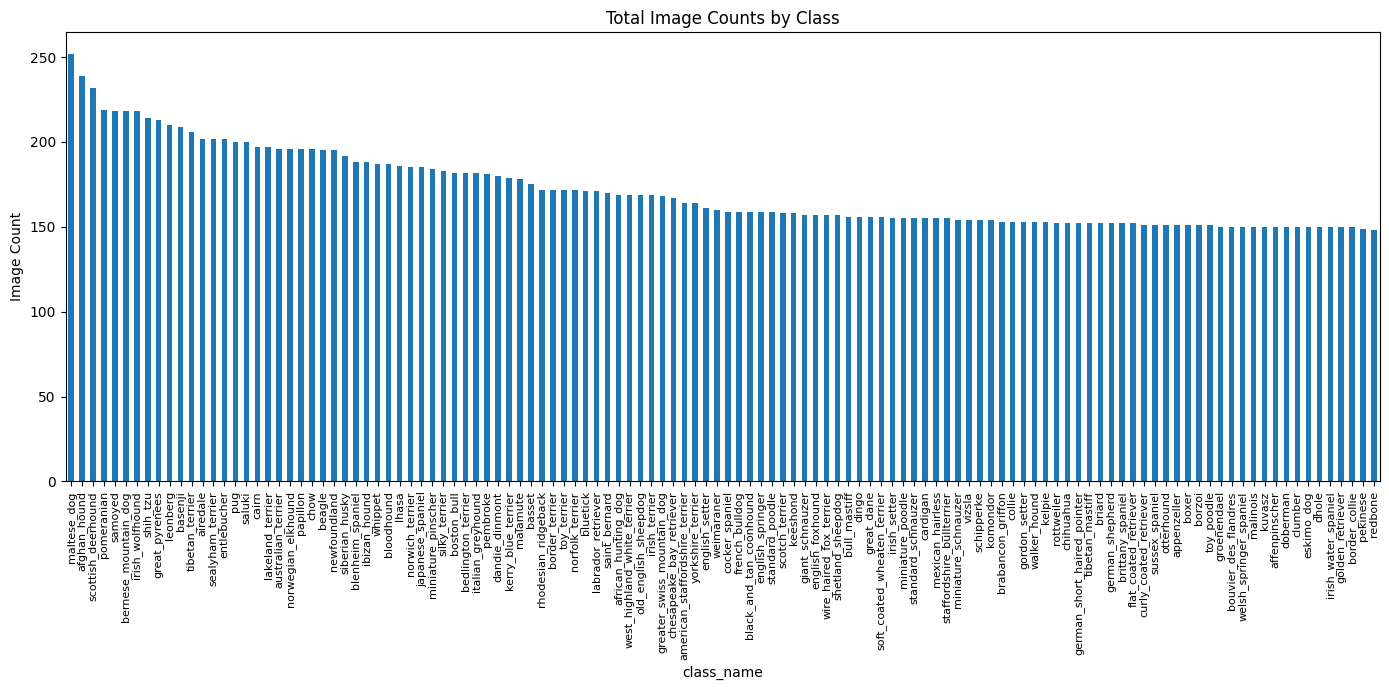

In [ ]:
# TK - turn the DataFrame above into a graph
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
image_counts_df.plot(kind="bar",
                     x="class_name",
                     y="image_count",
                     legend=False,
                     ax=plt.gca()) # plt.gca() = "get current axis", get the plt we setup above and put the data there

# Add customization
plt.ylabel("Image Count")
plt.title("Total Image Counts by Class")
plt.xticks(rotation=90, # Rotate the x labels for better visibility
           fontsize=8) # Make the font size smaller for easier reading
plt.tight_layout() # Ensure things fit nicely
plt.show()

```
images/
├── train/
│   ├── class_1/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   ├── train_image3.jpg
│   │   └── ...
│   ├── class_2/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   ├── train_image3.jpg
│   │   ├── train_image4.jpg
│   │   └── ...
│   └── class_3/
│       ├── train_image1.jpg
│       ├── train_image2.jpg
│       ├── train_image3.jpg
│       └── ...
└── test/
    ├── class_1/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
    │   └── ...
    ├── class_2/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
    │   └── ...
    └── class_3/
        ├── test_image1.jpg
        ├── test_image2.jpg
        └── ...
...
```


## TK - Create data splits

Want a directory structure of:

```
images_split/
  train/
    class_1/
    class_2/
    class_3/
  test/
    class_1/
    class_2/
    class_3/
```

In [ ]:
from pathlib import Path

images_dir = "Images"
images_split_dir = Path("images_split")

train_dir = images_split_dir / "train"
test_dir = images_split_dir / "test"

# Using Path.mkdir with exist_ok=True ensures the directory is created only if it doesn't exist
train_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)
print(f"Directory {train_dir} is ensured to exist.")
print(f"Directory {test_dir} is ensured to exist.")

# Make a folder for each dog name
for dog_name in dog_names:
  # Make training dir folder
  train_class_dir = train_dir / dog_name
  train_class_dir.mkdir(parents=True, exist_ok=True)
  print(f"Making directory: {train_class_dir}")

  # Make testing dir folder
  test_class_dir = test_dir / dog_name
  test_class_dir.mkdir(parents=True, exist_ok=True)
  print(f"Making directory: {test_class_dir}")

# Make sure there is 120 subfolders in each
assert count_subfolders(train_dir) == len(dog_names)
assert count_subfolders(test_dir) == len(dog_names)

Directory images_split/train is ensured to exist.
Directory images_split/test is ensured to exist.
Making directory: images_split/train/affenpinscher
Making directory: images_split/test/affenpinscher
Making directory: images_split/train/afghan_hound
Making directory: images_split/test/afghan_hound
Making directory: images_split/train/african_hunting_dog
Making directory: images_split/test/african_hunting_dog
Making directory: images_split/train/airedale
Making directory: images_split/test/airedale
Making directory: images_split/train/american_staffordshire_terrier
Making directory: images_split/test/american_staffordshire_terrier
Making directory: images_split/train/appenzeller
Making directory: images_split/test/appenzeller
Making directory: images_split/train/australian_terrier
Making directory: images_split/test/australian_terrier
Making directory: images_split/train/basenji
Making directory: images_split/test/basenji
Making directory: images_split/train/basset
Making directory: ima

In [ ]:
# Copy target images into their respective folders
from tqdm.auto import tqdm
from shutil import copy2

def copy_files_to_target_dir(file_list,
                             target_dir):
  for file in tqdm(file_list):
    source_file_path = Path(images_dir) / file

    file_class_name = folder_to_class_name_dict[file.split("/")[0]]
    file_image_name = file.split("/")[-1]

    destination_file_path = Path(target_dir) / file_class_name / file_image_name

    print(f"Copying: {source_file_path} to {destination_file_path}")
    copy2(src=source_file_path,
          dst=destination_file_path)

copy_files_to_target_dir(file_list=train_file_list,
                         target_dir=train_dir)

  0%|          | 0/12000 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Copying: Images/n02102973-Irish_water_spaniel/n02102973_2442.jpg to images_split/train/irish_water_spaniel/n02102973_2442.jpg
Copying: Images/n02102973-Irish_water_spaniel/n02102973_4794.jpg to images_split/train/irish_water_spaniel/n02102973_4794.jpg
Copying: Images/n02102973-Irish_water_spaniel/n02102973_220.jpg to images_split/train/irish_water_spaniel/n02102973_220.jpg
Copying: Images/n02102973-Irish_water_spaniel/n02102973_3978.jpg to images_split/train/irish_water_spaniel/n02102973_3978.jpg
Copying: Images/n02102973-Irish_water_spaniel/n02102973_634.jpg to images_split/train/irish_water_spaniel/n02102973_634.jpg
Copying: Images/n02102973-Irish_water_spaniel/n02102973_4304.jpg to images_split/train/irish_water_spaniel/n02102973_4304.jpg
Copying: Images/n02102973-Irish_water_spaniel/n02102973_3344.jpg to images_split/train/irish_water_spaniel/n02102973_3344.jpg
Copying: Images/n02102973-Irish_water_spaniel/n02102973_1140.jpg to ima

In [ ]:
copy_files_to_target_dir(file_list=test_file_list,
                         target_dir=test_dir)

# for file in tqdm(test_file_list):
#   source_file_path = Path(images_dir) / file

#   file_class_name = folder_to_class_name_dict[file.split("/")[0]]
#   file_image_name = file.split("/")[-1]

#   destination_file_path = Path(test_dir) / file_class_name / file_image_name

#   print(f"Copying: {source_file_path} to {destination_file_path}")
#   copy2(src=source_file_path,
#         dst=destination_file_path)

  0%|          | 0/8580 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Copying: Images/n02096437-Dandie_Dinmont/n02096437_3982.jpg to images_split/test/dandie_dinmont/n02096437_3982.jpg
Copying: Images/n02096437-Dandie_Dinmont/n02096437_3731.jpg to images_split/test/dandie_dinmont/n02096437_3731.jpg
Copying: Images/n02096437-Dandie_Dinmont/n02096437_1790.jpg to images_split/test/dandie_dinmont/n02096437_1790.jpg
Copying: Images/n02096437-Dandie_Dinmont/n02096437_1656.jpg to images_split/test/dandie_dinmont/n02096437_1656.jpg
Copying: Images/n02096437-Dandie_Dinmont/n02096437_91.jpg to images_split/test/dandie_dinmont/n02096437_91.jpg
Copying: Images/n02096437-Dandie_Dinmont/n02096437_2070.jpg to images_split/test/dandie_dinmont/n02096437_2070.jpg
Copying: Images/n02096437-Dandie_Dinmont/n02096437_4131.jpg to images_split/test/dandie_dinmont/n02096437_4131.jpg
Copying: Images/n02096437-Dandie_Dinmont/n02096437_1521.jpg to images_split/test/dandie_dinmont/n02096437_1521.jpg
Copying: Images/n02096437-Dandie_

In [ ]:
# Get lengths of all paths of train and test images
train_image_paths = list(train_dir.rglob("*.jpg"))
test_image_paths = list(test_dir.rglob("*.jpg"))
assert len(train_image_paths) == len(train_file_list)
assert len(test_image_paths) == len(test_file_list)

len(train_image_paths), len(test_image_paths)

(12000, 8580)

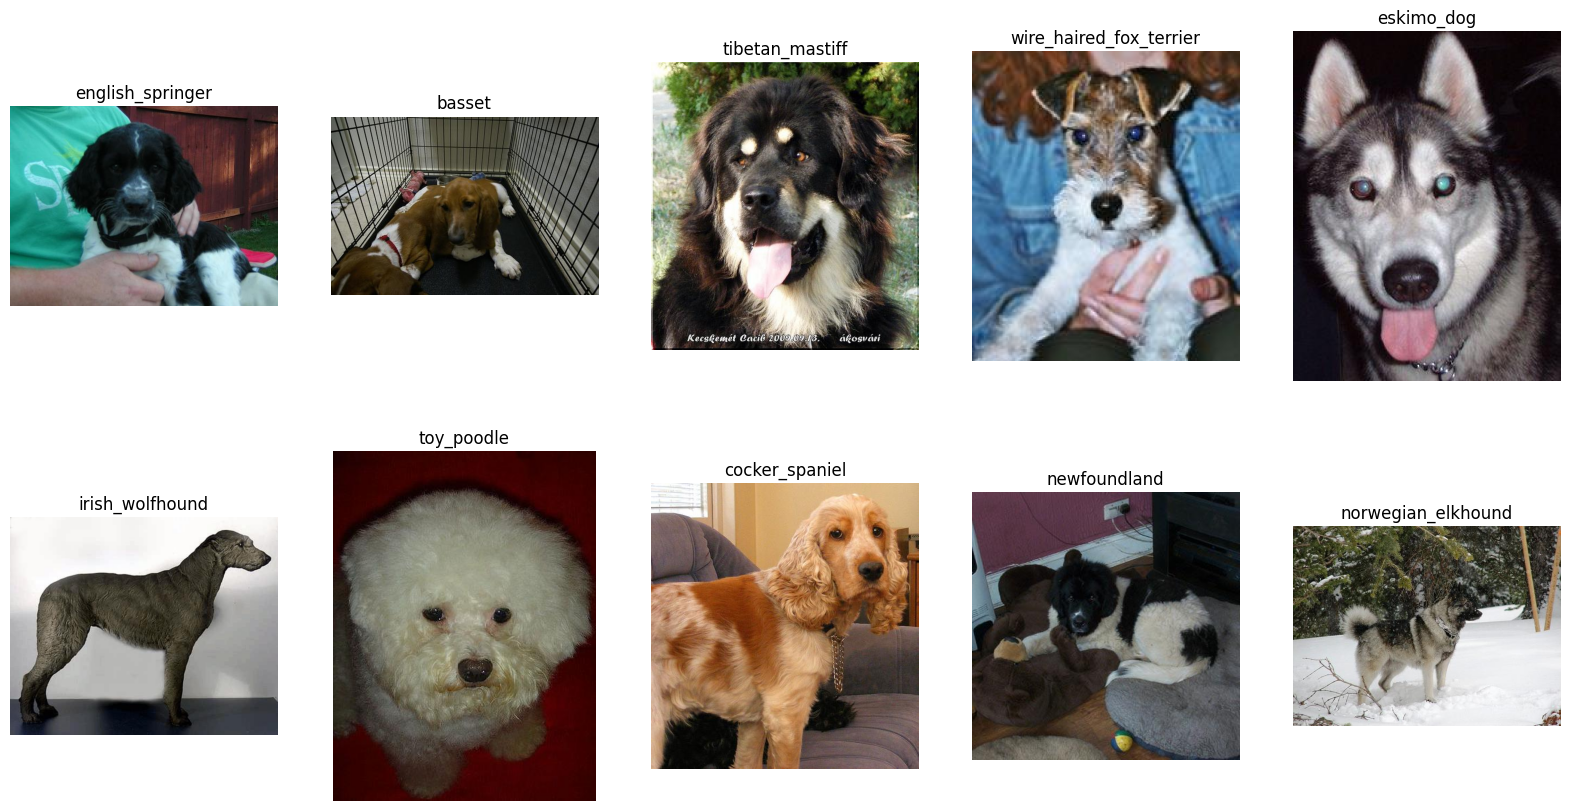

In [ ]:
# Plot 10 random images from train_image_paths
import matplotlib.pyplot as plt

def plot_10_random_images_from_path_list(path_list: list):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    samples = random.sample(path_list, 10)
    for i, ax in enumerate(axes.flatten()):
        sample_path = samples[i]
        sample_title = sample_path.parent.stem
        ax.imshow(plt.imread(sample_path))
        ax.set_title(sample_title)
        ax.axis("off")

plot_10_random_images_from_path_list(train_image_paths)

### TK - Make a 10% training dataset

* Can copy a random 10% of the training images into a new folder
* Try to train a model on a smaller amount of data

In [ ]:
# TK - get the train file paths
# Get a random 10% of them
# Copy them to a target directory, e.g. train_dir_10_percent

# Create train_10_percent directory
train_10_percent_dir = images_split_dir / "train_10_percent"
train_10_percent_dir.mkdir(parents=True, exist_ok=True)

import random
random.seed(42)

train_image_paths_random_10_percent = random.sample(population=train_image_paths,
                                                    k=int(0.1*len(train_image_paths)))
len(train_image_paths_random_10_percent)

for path in tqdm(train_image_paths_random_10_percent):
  source_file_path = path
  destination_file_path = train_10_percent_dir / Path(*path.parts[-2:])

  print(destination_file_path.parent)
  # If the target directory doesn't exist, make it
  target_class_dir = destination_file_path.parent
  if not target_class_dir.is_dir():
    print(f"Making directory: {target_class_dir}")
    target_class_dir.mkdir(parents=True,
                           exist_ok=True)

  print(f"Copying: {source_file_path} to {destination_file_path}")
  copy2(src=source_file_path,
        dst=destination_file_path)

  0%|          | 0/1200 [00:00<?, ?it/s]

images_split/train_10_percent/clumber
Making directory: images_split/train_10_percent/clumber
Copying: images_split/train/clumber/n02101556_7528.jpg to images_split/train_10_percent/clumber/n02101556_7528.jpg
images_split/train_10_percent/komondor
Making directory: images_split/train_10_percent/komondor
Copying: images_split/train/komondor/n02105505_1406.jpg to images_split/train_10_percent/komondor/n02105505_1406.jpg
images_split/train_10_percent/newfoundland
Making directory: images_split/train_10_percent/newfoundland
Copying: images_split/train/newfoundland/n02111277_10160.jpg to images_split/train_10_percent/newfoundland/n02111277_10160.jpg
images_split/train_10_percent/afghan_hound
Making directory: images_split/train_10_percent/afghan_hound
Copying: images_split/train/afghan_hound/n02088094_4049.jpg to images_split/train_10_percent/afghan_hound/n02088094_4049.jpg
images_split/train_10_percent/briard
Making directory: images_split/train_10_percent/briard
Copying: images_split/trai

In [ ]:
# Count images in train_10_percent_dir
train_10_percent_image_class_counts = count_images_in_subdirs(train_10_percent_dir)
train_10_percent_image_class_counts_df = pd.DataFrame(train_10_percent_image_class_counts).sort_values("image_count", ascending=True)
train_10_percent_image_class_counts_df

class_name  image_count
33                     doberman            3
23                     pembroke            4
61            brabancon_griffon            4
64         old_english_sheepdog            4
100              scotch_terrier            5
..                          ...          ...
40                       briard           16
88                       collie           16
11   greater_swiss_mountain_dog           17
43               cocker_spaniel           18
90                        boxer           19

[120 rows x 2 columns]

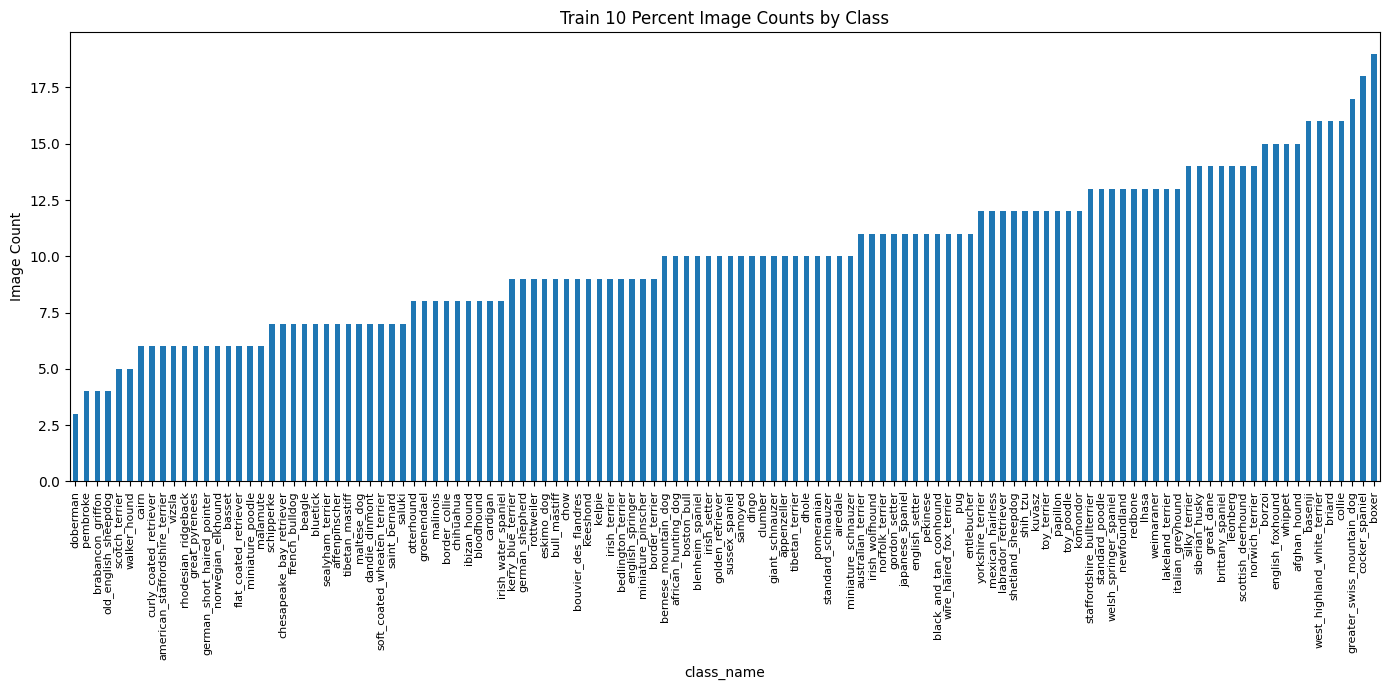

In [ ]:
# TK - turn the DataFrame above into a graph
plt.figure(figsize=(14, 7))
train_10_percent_image_class_counts_df.plot(kind="bar",
                     x="class_name",
                     y="image_count",
                     legend=False,
                     ax=plt.gca()) # plt.gca() = "get current axis", get the plt we setup above and put the data there

# Add customization
plt.title("Train 10 Percent Image Counts by Class")
plt.ylabel("Image Count")
plt.xticks(rotation=90, # Rotate the x labels for better visibility
           fontsize=8) # Make the font size smaller for easier reading
plt.tight_layout() # Ensure things fit nicely
plt.show()

## TK - Turn datasets into TensorFlow Dataset(s)

* See here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
* Also here: https://www.tensorflow.org/tutorials/load_data/images


> **Note:** TK - If you're working with similar styles of data (e.g. all dog photos), it's best practice to shuffle training datasets to prevent the model from learning any order in the data, no need to shuffle testing datasets (this makes for easier evaluation).

In [ ]:
import tensorflow as tf

img_size = 224
batch_size = 32

train_10_percent_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_10_percent_dir,
    batch_size=32,
    image_size=(img_size, img_size),
    shuffle=True,
    seed=42
)

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    batch_size=32,
    image_size=(img_size, img_size),
    shuffle=True,
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    batch_size=32,
    image_size=(img_size, img_size),
    shuffle=False,
    seed=42
)

Found 1200 files belonging to 120 classes.
Found 12000 files belonging to 120 classes.
Found 8580 files belonging to 120 classes.


In [ ]:
assert set(train_10_percent_ds.class_names) == set(train_ds.class_names) == set(test_ds.class_names)

In [ ]:
class_names = train_ds.class_names
class_names[:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

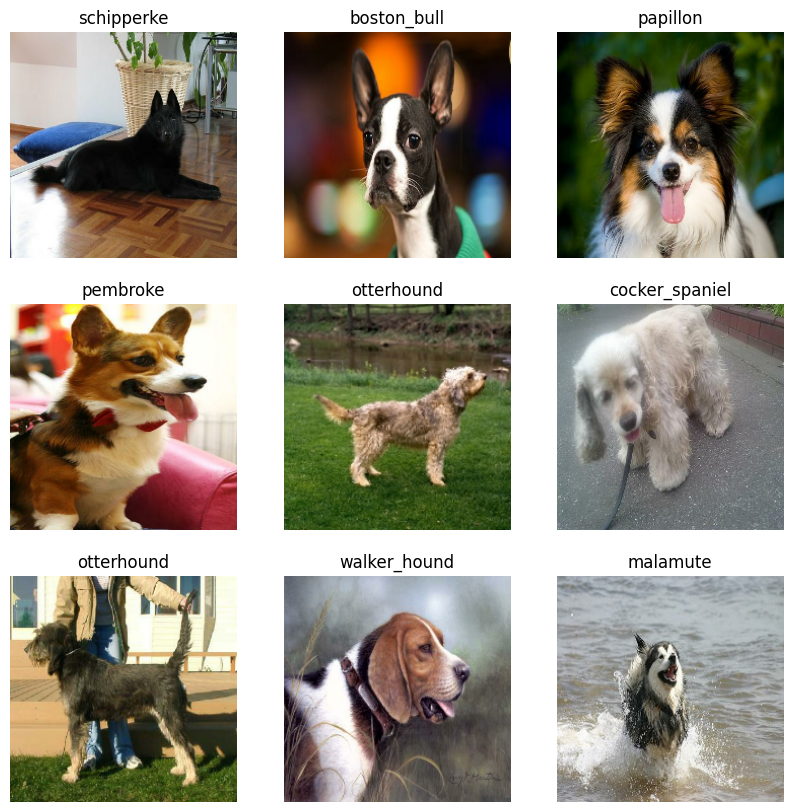

In [ ]:
import matplotlib.pyplot as plt

# TK - change this to a similar version of the above plotting function
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# TK - what does a single image look like?
image_batch, label_batch = next(iter(train_ds))
image_batch.shape, label_batch.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32]))

In [ ]:
image_batch[0], label_batch[0], class_names[label_batch[0]]

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[ 95.33705 , 149.33705 , 213.33705 ],
         [ 95.33705 , 149.33705 , 213.33705 ],
         [ 95.33705 , 149.33705 , 213.33705 ],
         ...,
         [102.33705 , 154.33705 , 214.33705 ],
         [102.33705 , 152.33705 , 213.33705 ],
         [102.33705 , 152.33705 , 213.33705 ]],
 
        [[ 96.      , 150.      , 214.      ],
         [ 96.      , 150.      , 214.      ],
         [ 96.      , 150.      , 214.      ],
         ...,
         [103.      , 155.      , 215.      ],
         [103.      , 153.      , 214.      ],
         [103.      , 153.      , 214.      ]],
 
        [[ 96.685265, 150.68527 , 214.68527 ],
         [ 96.685265, 150.68527 , 214.68527 ],
         [ 96.685265, 150.68527 , 214.68527 ],
         ...,
         [103.685265, 155.68527 , 215.68527 ],
         [103.685265, 153.68527 , 214.68527 ],
         [103.685265, 153.68527 , 214.68527 ]],
 
        ...,
 
        [[ 98.23341 , 113.76687 

### TK - Configure the dataset for performance

* See here: https://www.tensorflow.org/guide/data_performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

# Shuffle training datasets but don't need to shuffle test datasets (for easier evaluation)
train_10_percent_ds = train_10_percent_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## TK - Create model

### TK - Try transfer learning

* Only want to train the last layer of the model...
* See here: https://keras.io/guides/transfer_learning/

In [ ]:
num_classes = len(class_names)

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    input_shape=(img_size, img_size, 3),
    include_preprocessing=True
)

# base_model.summary()

# Freeze the base model
base_model.trainable = False
base_model.trainable

24274472/24274472 [==============================] - 1s 0us/step


False

In [ ]:
# TK - functionize this model creation step

# Create new model
inputs = tf.keras.Input(shape=(224, 224, 3))

# TK - Create data augmentation
# x = data_augmentation(inputs)

# Craft model
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(units=num_classes,
                                activation="softmax", # TK - which activation function should you use?
                                name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs, name="model_0")
model_0.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 7, 7, 1280)        5919312   
 nal)                                                            
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 output_layer (Dense)        (None, 120)               153720    
                                                                 
Total params: 6073032 (23.17 MB)
Trainable params: 153720 (

In [ ]:
# Functionize model creation
from typing import Tuple

def create_model(include_top: bool = False,
                 num_classes: int = 1000,
                 input_shape: Tuple[int, int, int] = (224, 224, 3),
                 include_preprocessing: bool = True,
                 trainable: bool = False,
                 dropout: float = 0.2,
                 model_name: str = "model") -> tf.keras.Model:
  """
  Create an EfficientNetV2 B0 feature extractor model with a custom classifier layer.

  Args:
      include_top (bool, optional): Whether to include the top (classifier) layers of the model.
      num_classes (int, optional): Number of output classes for the classifier layer.
      input_shape (Tuple[int, int, int], optional): Input shape for the model's images (height, width, channels).
      include_preprocessing (bool, optional): Whether to include preprocessing layers for image normalization.
      trainable (bool, optional): Whether to make the base model trainable.
      dropout (float, optional): Dropout rate for the global average pooling layer.
      model_name (str, optional): Name for the created model.

  Returns:
      tf.keras.Model: A TensorFlow Keras model with the specified configuration.
  """
  # Create base model
  base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=include_top,
    weights="imagenet",
    input_shape=input_shape,
    include_preprocessing=include_preprocessing
  )

  # Freeze the base model (if necessary)
  base_model.trainable = trainable

  # Create input layer
  inputs = tf.keras.Input(shape=input_shape, name="input_layer")

  # Create model backbone
  x = base_model(inputs, training=trainable)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  # Create output layer (also known as "classifier" layer)
  outputs = tf.keras.layers.Dense(units=num_classes,
                                  activation="softmax",
                                  name="output_layer")(x)

  # Connect input and output layer
  model = tf.keras.Model(inputs,
                         outputs,
                         name=model_name)

  return model

model_0 = create_model(num_classes=len(class_names))
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 7, 7, 1280)        5919312   
 nal)                                                            
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 output_layer (Dense)        (None, 120)               153720    
                                                                 
Total params: 6073032 (23.17 MB)
Trainable params: 153720 (60

## TK - Model 0 - Train a model on 10% of the training data

* TK - turn this into a table
* TK - add docs for compile + fit + evaluate + predict

A note on losses:
* If your labels are integers (e.g. `[[1], [23], [43], [16]...]`), use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)
* If your labels are one-hot encoded (e.g. `[0, 1, 0, 0, 1, 0...]`), use [`tf.keras.losses.CategoricalCrossEntropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy)

In [ ]:
# Create model
model_0 = create_model(num_classes=len(class_names),
                       model_name="model_0")

# Compile model
model_0.compile(optimizer="adam", # or can use tf.keras.optimizers.Adam()
                # Set from_logits=True if the last layer of your net is a Dense layer with no activation
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=["accuracy"],
                steps_per_execution="auto")# new in TensorFlow 2.14.0

# Fit model
epochs=5
history_0 = model_0.fit(
  train_10_percent_ds,
  validation_data=test_ds,
  epochs=epochs)

Epoch 1/5
38/38 [==============================] - 25s 259ms/step - loss: 4.1107 - accuracy: 0.2150 - val_loss: 3.2047 - val_accuracy: 0.5185
Epoch 2/5
38/38 [==============================] - 7s 184ms/step - loss: 2.3102 - accuracy: 0.7217 - val_loss: 2.0488 - val_accuracy: 0.6721
Epoch 3/5
38/38 [==============================] - 7s 184ms/step - loss: 1.2899 - accuracy: 0.8500 - val_loss: 1.4266 - val_accuracy: 0.7488
Epoch 4/5
38/38 [==============================] - 7s 181ms/step - loss: 0.7874 - accuracy: 0.9158 - val_loss: 1.1094 - val_accuracy: 0.7873
Epoch 5/5
38/38 [==============================] - 7s 180ms/step - loss: 0.5392 - accuracy: 0.9467 - val_loss: 0.9386 - val_accuracy: 0.8014


### TK - Evaluate Model 0 on the test data

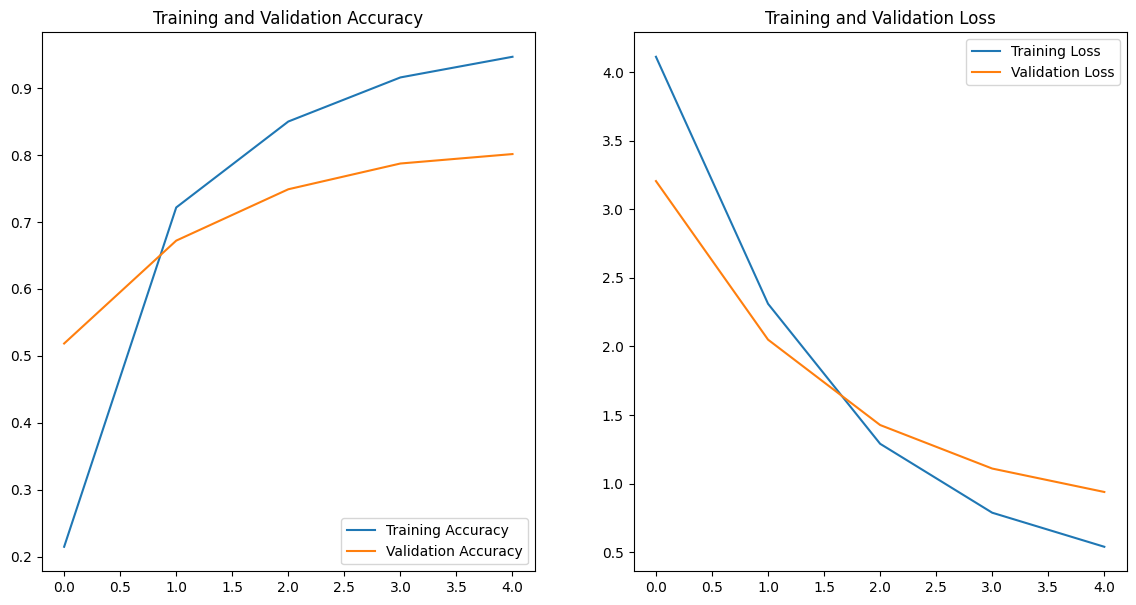

In [ ]:
def plot_model_loss_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(14, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

plot_model_loss_curves(history=history_0)

In [ ]:
# Evaluate model_0, see: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
model_0_results = model_0.evaluate(test_ds)

269/269 [==============================] - 6s 23ms/step - loss: 0.9386 - accuracy: 0.8014


## TK - Model 1 - Train a model on 100% of the training data

Repeat the process for the above and compare the results

In [ ]:
model_1 = create_model(num_classes=len(class_names),
                       model_name="model_1")
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 7, 7, 1280)        5919312   
 nal)                                                            
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 output_layer (Dense)        (None, 120)               153720    
                                                                 
Total params: 6073032 (23.17 MB)
Trainable params: 153720 (

In [ ]:
# Compile the model
model_1.compile(optimizer="adam",
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # if no activation function at end of model, use "from_logits=True"
                metrics=["accuracy"])

# Train the model
tf.keras.utils.set_random_seed(42)
history_1 = model_1.fit(train_ds,
                        epochs=epochs,
                        validation_data=test_ds)

Epoch 1/5
375/375 [==============================] - 27s 44ms/step - loss: 1.3750 - accuracy: 0.7448 - val_loss: 0.5082 - val_accuracy: 0.8716
Epoch 2/5
375/375 [==============================] - 15s 41ms/step - loss: 0.4004 - accuracy: 0.8932 - val_loss: 0.4060 - val_accuracy: 0.8809
Epoch 3/5
375/375 [==============================] - 15s 41ms/step - loss: 0.2884 - accuracy: 0.9206 - val_loss: 0.3812 - val_accuracy: 0.8817
Epoch 4/5
375/375 [==============================] - 15s 40ms/step - loss: 0.2308 - accuracy: 0.9369 - val_loss: 0.3724 - val_accuracy: 0.8841
Epoch 5/5
375/375 [==============================] - 15s 39ms/step - loss: 0.1896 - accuracy: 0.9482 - val_loss: 0.3617 - val_accuracy: 0.8829


TK - How many epochs should I fit for? ... generally with transfer learning you can get pretty good results quite quickly, however, you may want to look into training for longer, e.g. more epochs, fine-tuning the whole model and using callbacks such as Early Stopping to prevent the model from training for too long

### TK - Evaluate Model 1 on the test data

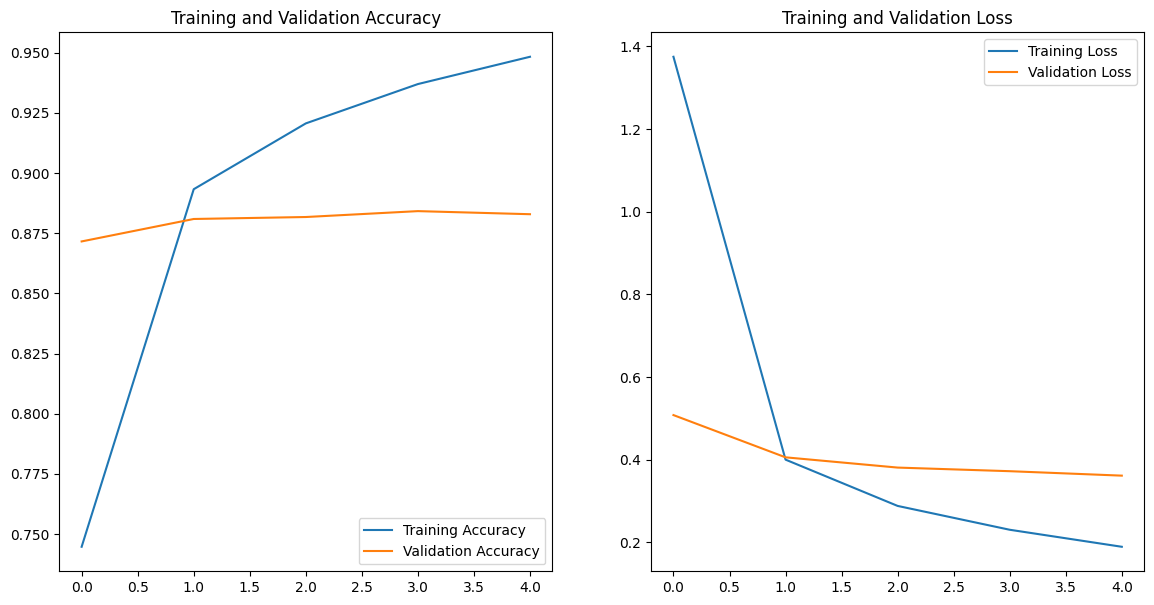

In [ ]:
plot_model_loss_curves(history=history_1)

In [ ]:
# Evaluate model_1
model_1_results = model_1.evaluate(test_ds)

269/269 [==============================] - 6s 23ms/step - loss: 0.3617 - accuracy: 0.8829


## TK - Make and evaluate predictions of the best model

In [ ]:
# This will output logits (as long as softmax activation isn't in the model)
test_preds = model_1.predict(test_ds)

# Note: If not using activation="softmax" in last layer of model, may need to turn them into prediction probabilities (easier to understand)
# test_preds = tf.keras.activations.softmax(tf.constant(test_preds), axis=-1)

269/269 [==============================] - 7s 21ms/step


In [ ]:
test_preds.shape

(8580, 120)

In [ ]:
test_preds[0].shape, tf.argmax(test_preds[0])

((120,), <tf.Tensor: shape=(), dtype=int64, numpy=0>)

In [ ]:
import numpy as np
test_ds_images = np.concatenate([images for images, labels in test_ds], axis=0)
test_ds_labels = np.concatenate([labels for images, labels in test_ds], axis=0)
test_ds_labels[0], test_ds_images[0]

(0,
 array([[[ 43.804947,  44.804947,  38.804947],
         [ 39.12483 ,  40.12483 ,  34.12483 ],
         [ 82.701065,  83.701065,  77.62723 ],
         ...,
         [ 21.578135,  25.578135,  24.578135],
         [ 19.741274,  23.741274,  22.741274],
         [ 15.660867,  19.660868,  18.660868]],
 
        [[ 40.762886,  41.762886,  35.41467 ],
         [ 38.87469 ,  39.87469 ,  33.526478],
         [ 84.99161 ,  85.99161 ,  78.59259 ],
         ...,
         [ 20.462063,  24.462063,  23.462063],
         [ 19.207607,  23.207607,  22.207607],
         [ 18.408989,  22.408989,  21.408989]],
 
        [[ 37.69817 ,  38.69817 ,  30.698172],
         [ 42.096752,  43.096752,  35.096752],
         [ 93.62746 ,  94.81206 ,  86.258255],
         ...,
         [ 19.530594,  23.530594,  22.530594],
         [ 18.091536,  22.091536,  21.091536],
         [ 19.202106,  23.202106,  22.202106]],
 
        ...,
 
        [[106.28673 ,  70.28673 ,  96.28673 ],
         [105.43164 ,  69.43164 ,  95

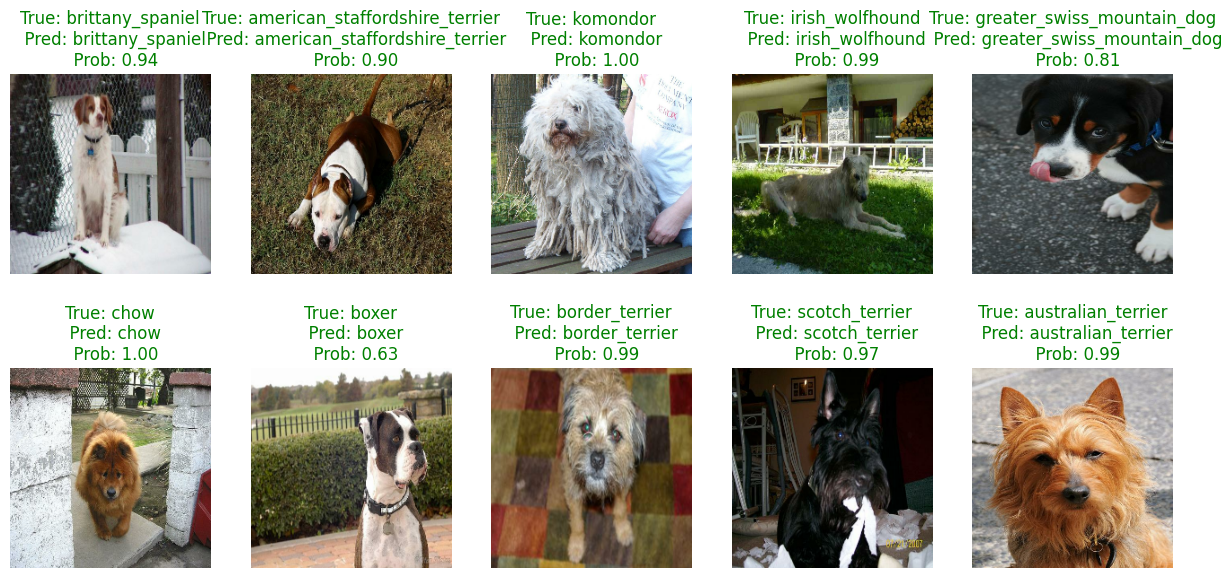

In [ ]:
# Choose a random 10 indexes from the test data and compare the values
import random

random_indexes = random.sample(range(len(test_ds_images)), 10)

# TK - this is why we don't shuffle the test data
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  target_index = random_indexes[i]

  # Get relevant target image, label, prediction and prediction probabilities
  test_image = test_ds_images[target_index]
  test_image_truth_label = class_names[test_ds_labels[target_index]]
  test_image_pred_probs = test_preds[target_index]
  test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

  # Plot the image
  ax.imshow(test_image.astype("uint8"))

  # Create sample title
  title = f"""True: {test_image_truth_label}
  Pred: {test_image_pred_class}
  Prob: {np.max(test_image_pred_probs):.2f}"""

  # Colour the title based on correctness of pred
  ax.set_title(title,
               color="green" if test_image_truth_label == test_image_pred_class else "red")
  ax.axis("off")

### TK - Accuracy per class

In [ ]:
# TK - get accuracy values per class and show how they compare to the original results
# see: http://vision.stanford.edu/aditya86/ImageNetDogs/ -> http://vision.stanford.edu/aditya86/ImageNetDogs/bar_graph_full.png

# Want to compare test_preds + test_labels on a per class basis
# Can I convert both of these into a DataFrame and see what happens?
test_preds_labels = test_preds.argmax(axis=-1)
test_preds_labels

array([  0,   0,   0, ..., 102, 119, 119])

In [ ]:
test_ds_labels

array([  0,   0,   0, ..., 119, 119, 119], dtype=int32)

In [ ]:
test_results_df = pd.DataFrame({"test_pred_label": test_preds_labels,
                                "test_pred_prob": np.max(test_preds, axis=-1),
                                "test_pred_class_name": [class_names[test_pred_label] for test_pred_label in test_preds_labels],
                                "test_truth_label": test_ds_labels,
                                "test_truth_class_name": [class_names[test_truth_label] for test_truth_label in test_ds_labels]})

test_results_df["correct"] = (test_results_df["test_pred_class_name"] == test_results_df["test_truth_class_name"]).astype(int)
test_results_df

test_pred_label  test_pred_prob   test_pred_class_name  \
0                   0        0.981926          affenpinscher   
1                   0        0.747863          affenpinscher   
2                   0        0.995609          affenpinscher   
3                  44        0.467855  flat_coated_retriever   
4                   0        0.997168          affenpinscher   
...               ...             ...                    ...   
8575              119        0.785783      yorkshire_terrier   
8576              102        0.735301          silky_terrier   
8577              102        0.828518          silky_terrier   
8578              119        0.940582      yorkshire_terrier   
8579              119        0.603093      yorkshire_terrier   

      test_truth_label test_truth_class_name  correct  
0                    0         affenpinscher        1  
1                    0         affenpinscher        1  
2                    0         affenpinscher        1  
3                    0         affenpinscher        0  
4                    0         affenpinscher        1  
...                ...                   ...      ...  
8575               119     yorkshire_terrier        1  
8576               119     yorkshire_terrier        0  
8577               119     yorkshire_terrier        0  
8578               119     yorkshire_terrier        1  
8579               119     yorkshire_terrier        1  

[8580 rows x 6 columns]

In [ ]:
# Calculate accuracy per class
accuracy_per_class = test_results_df.groupby("test_truth_class_name")["correct"].mean()
accuracy_per_class_df = pd.DataFrame(accuracy_per_class).reset_index().sort_values("correct", ascending=False)
accuracy_per_class_df
# pd.DataFrame(accuracy_per_class).sort_values("correct", ascending=False)

test_truth_class_name   correct
62                    keeshond  1.000000
10          bedlington_terrier  1.000000
30                        chow  0.989583
92               saint_bernard  0.985714
2          african_hunting_dog  0.985507
..                         ...       ...
76            miniature_poodle  0.600000
5                  appenzeller  0.588235
104  staffordshire_bullterrier  0.581818
16               border_collie  0.560000
43                  eskimo_dog  0.440000

[120 rows x 2 columns]

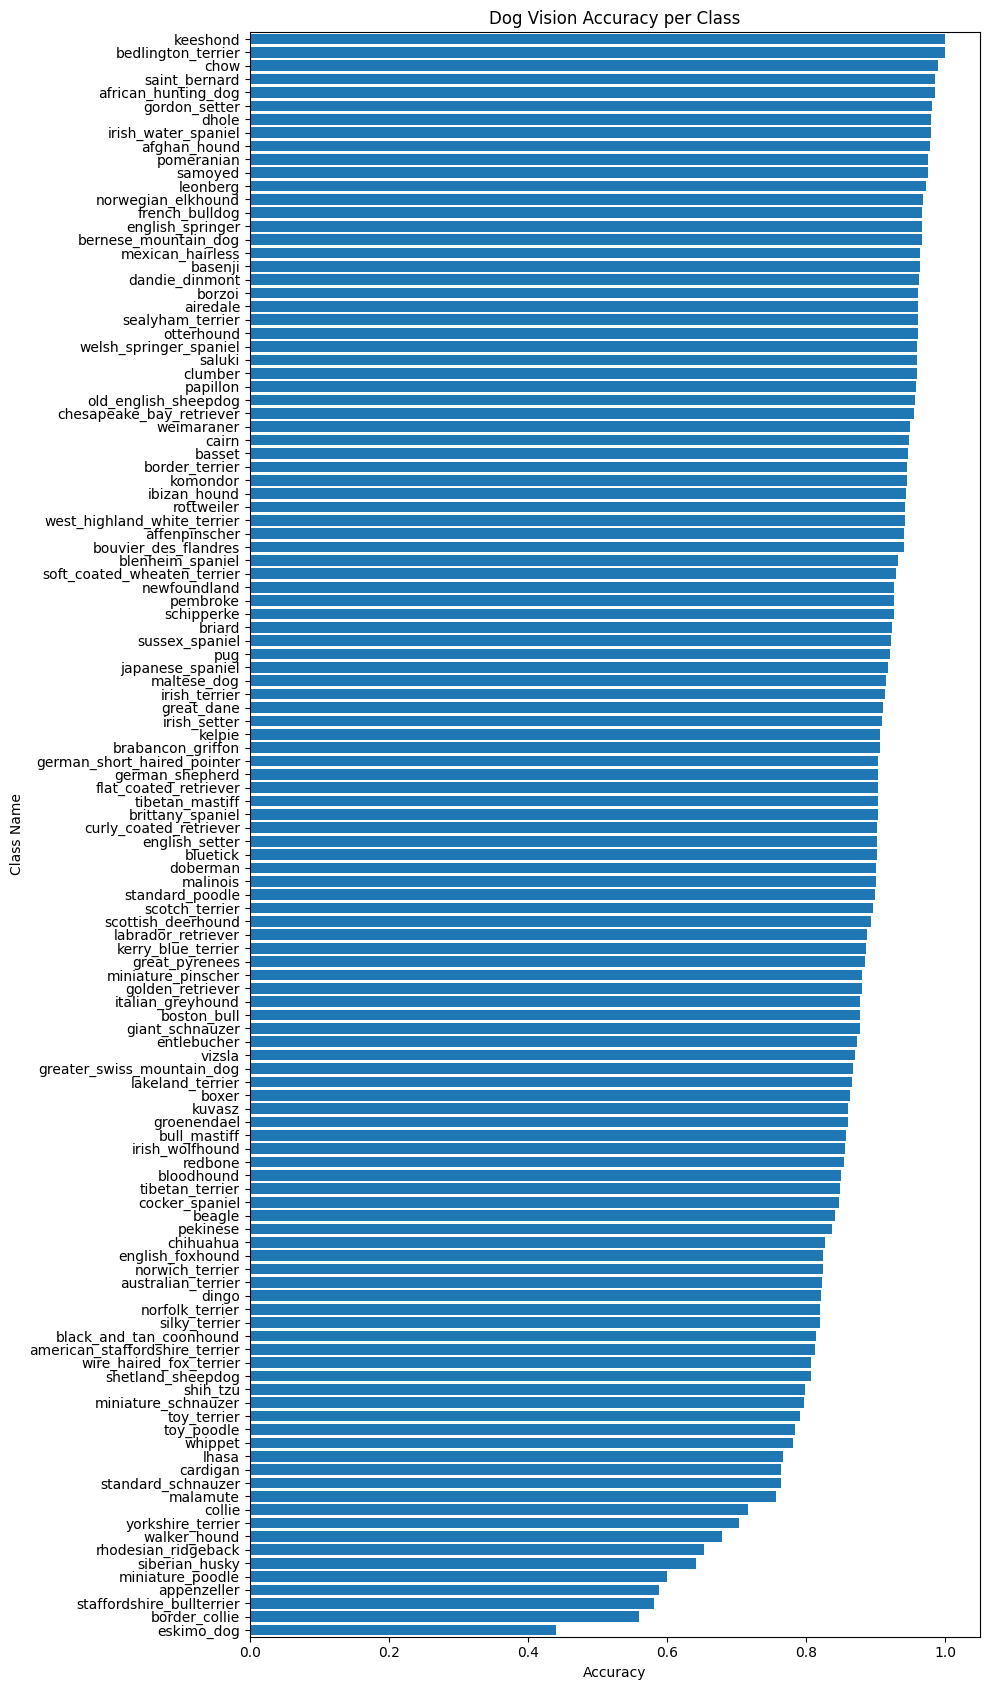

In [ ]:
# Let's create a horizontal bar chart to replicate a similar plot to the original Stanford Dogs page
plt.figure(figsize=(10, 17))
plt.barh(y=accuracy_per_class_df["test_truth_class_name"],
         width=accuracy_per_class_df["correct"])
plt.xlabel("Accuracy")
plt.ylabel("Class Name")
plt.title("Dog Vision Accuracy per Class")
plt.ylim(-0.5, len(accuracy_per_class_df["test_truth_class_name"]) - 0.5)  # Adjust y-axis limits to reduce white space
plt.gca().invert_yaxis()  # This will display the first class at the top
plt.tight_layout()
plt.show()

TK - How does this compare to the original results?

### TK - Finding the most wrong examples

In [ ]:
# Get most wrong
top_100_most_wrong = test_results_df[test_results_df["correct"] == 0].sort_values("test_pred_prob", ascending=False)[:100]
top_100_most_wrong

test_pred_label  test_pred_prob            test_pred_class_name  \
2727               75        0.993720              miniature_pinscher   
6884               54        0.993490                     groenendael   
5480               44        0.990781           flat_coated_retriever   
7630                4        0.988580  american_staffordshire_terrier   
4155               55        0.986820                    ibizan_hound   
...               ...             ...                             ...   
2644               63        0.882950                          kelpie   
7934               73        0.882824                     maltese_dog   
1059               14        0.881923                      bloodhound   
2047               86        0.879732                        pembroke   
4601               15        0.878603                        bluetick   

      test_truth_label      test_truth_class_name  correct  
2727                38                   doberman        0  
6884                95                 schipperke        0  
5480                78               newfoundland        0  
7630               104  staffordshire_bullterrier        0  
4155                60          italian_greyhound        0  
...                ...                        ...      ...  
2644                37                      dingo        0  
7934               109            tibetan_terrier        0  
1059                12    black_and_tan_coonhound        0  
2047                27                   cardigan        0  
4601                67         labrador_retriever        0  

[100 rows x 6 columns]

In [ ]:
top_100_most_wrong.sample(n=10).index

7804

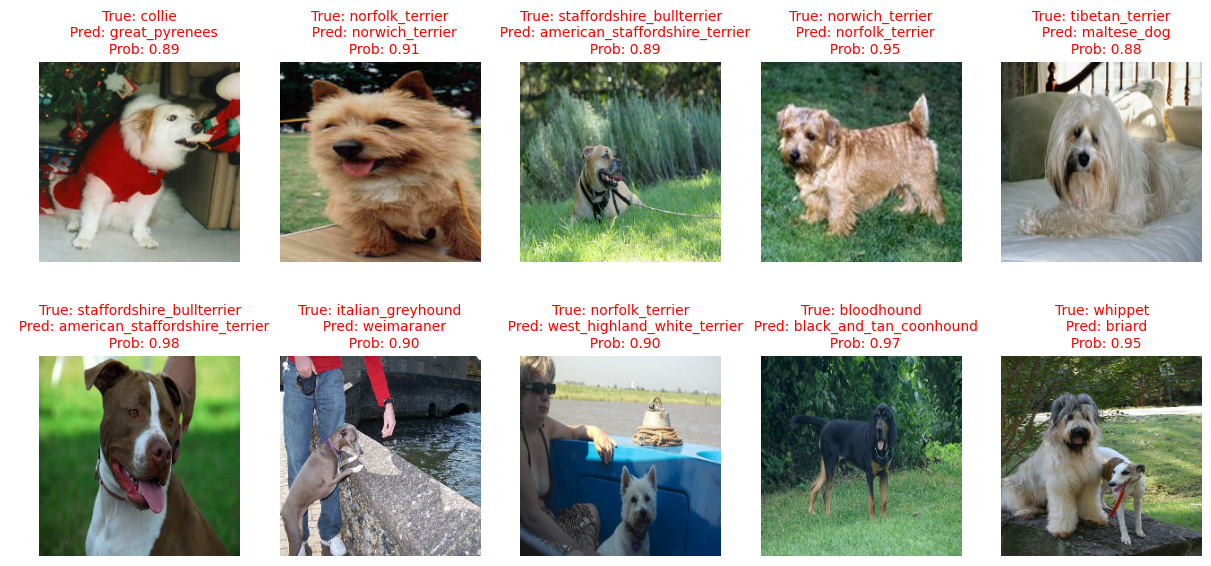

In [ ]:
# Choose a random 10 indexes from the test data and compare the values
import random

random_most_wrong_indexes = top_100_most_wrong.sample(n=10).index

# TK - this is why we don't shuffle the test data
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  target_index = random_most_wrong_indexes[i]

  # Get relevant target image, label, prediction and prediction probabilities
  test_image = test_ds_images[target_index]
  test_image_truth_label = class_names[test_ds_labels[target_index]]
  test_image_pred_probs = test_preds[target_index]
  test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

  # Plot the image
  ax.imshow(test_image.astype("uint8"))

  # Create sample title
  title = f"""True: {test_image_truth_label}
  Pred: {test_image_pred_class}
  Prob: {np.max(test_image_pred_probs):.2f}"""

  # Colour the title based on correctness of pred
  ax.set_title(title,
               color="green" if test_image_truth_label == test_image_pred_class else "red",
               fontsize=10)
  ax.axis("off")

### TK - Create a confusion matrix

TK see docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn-metrics-confusionmatrixdisplay

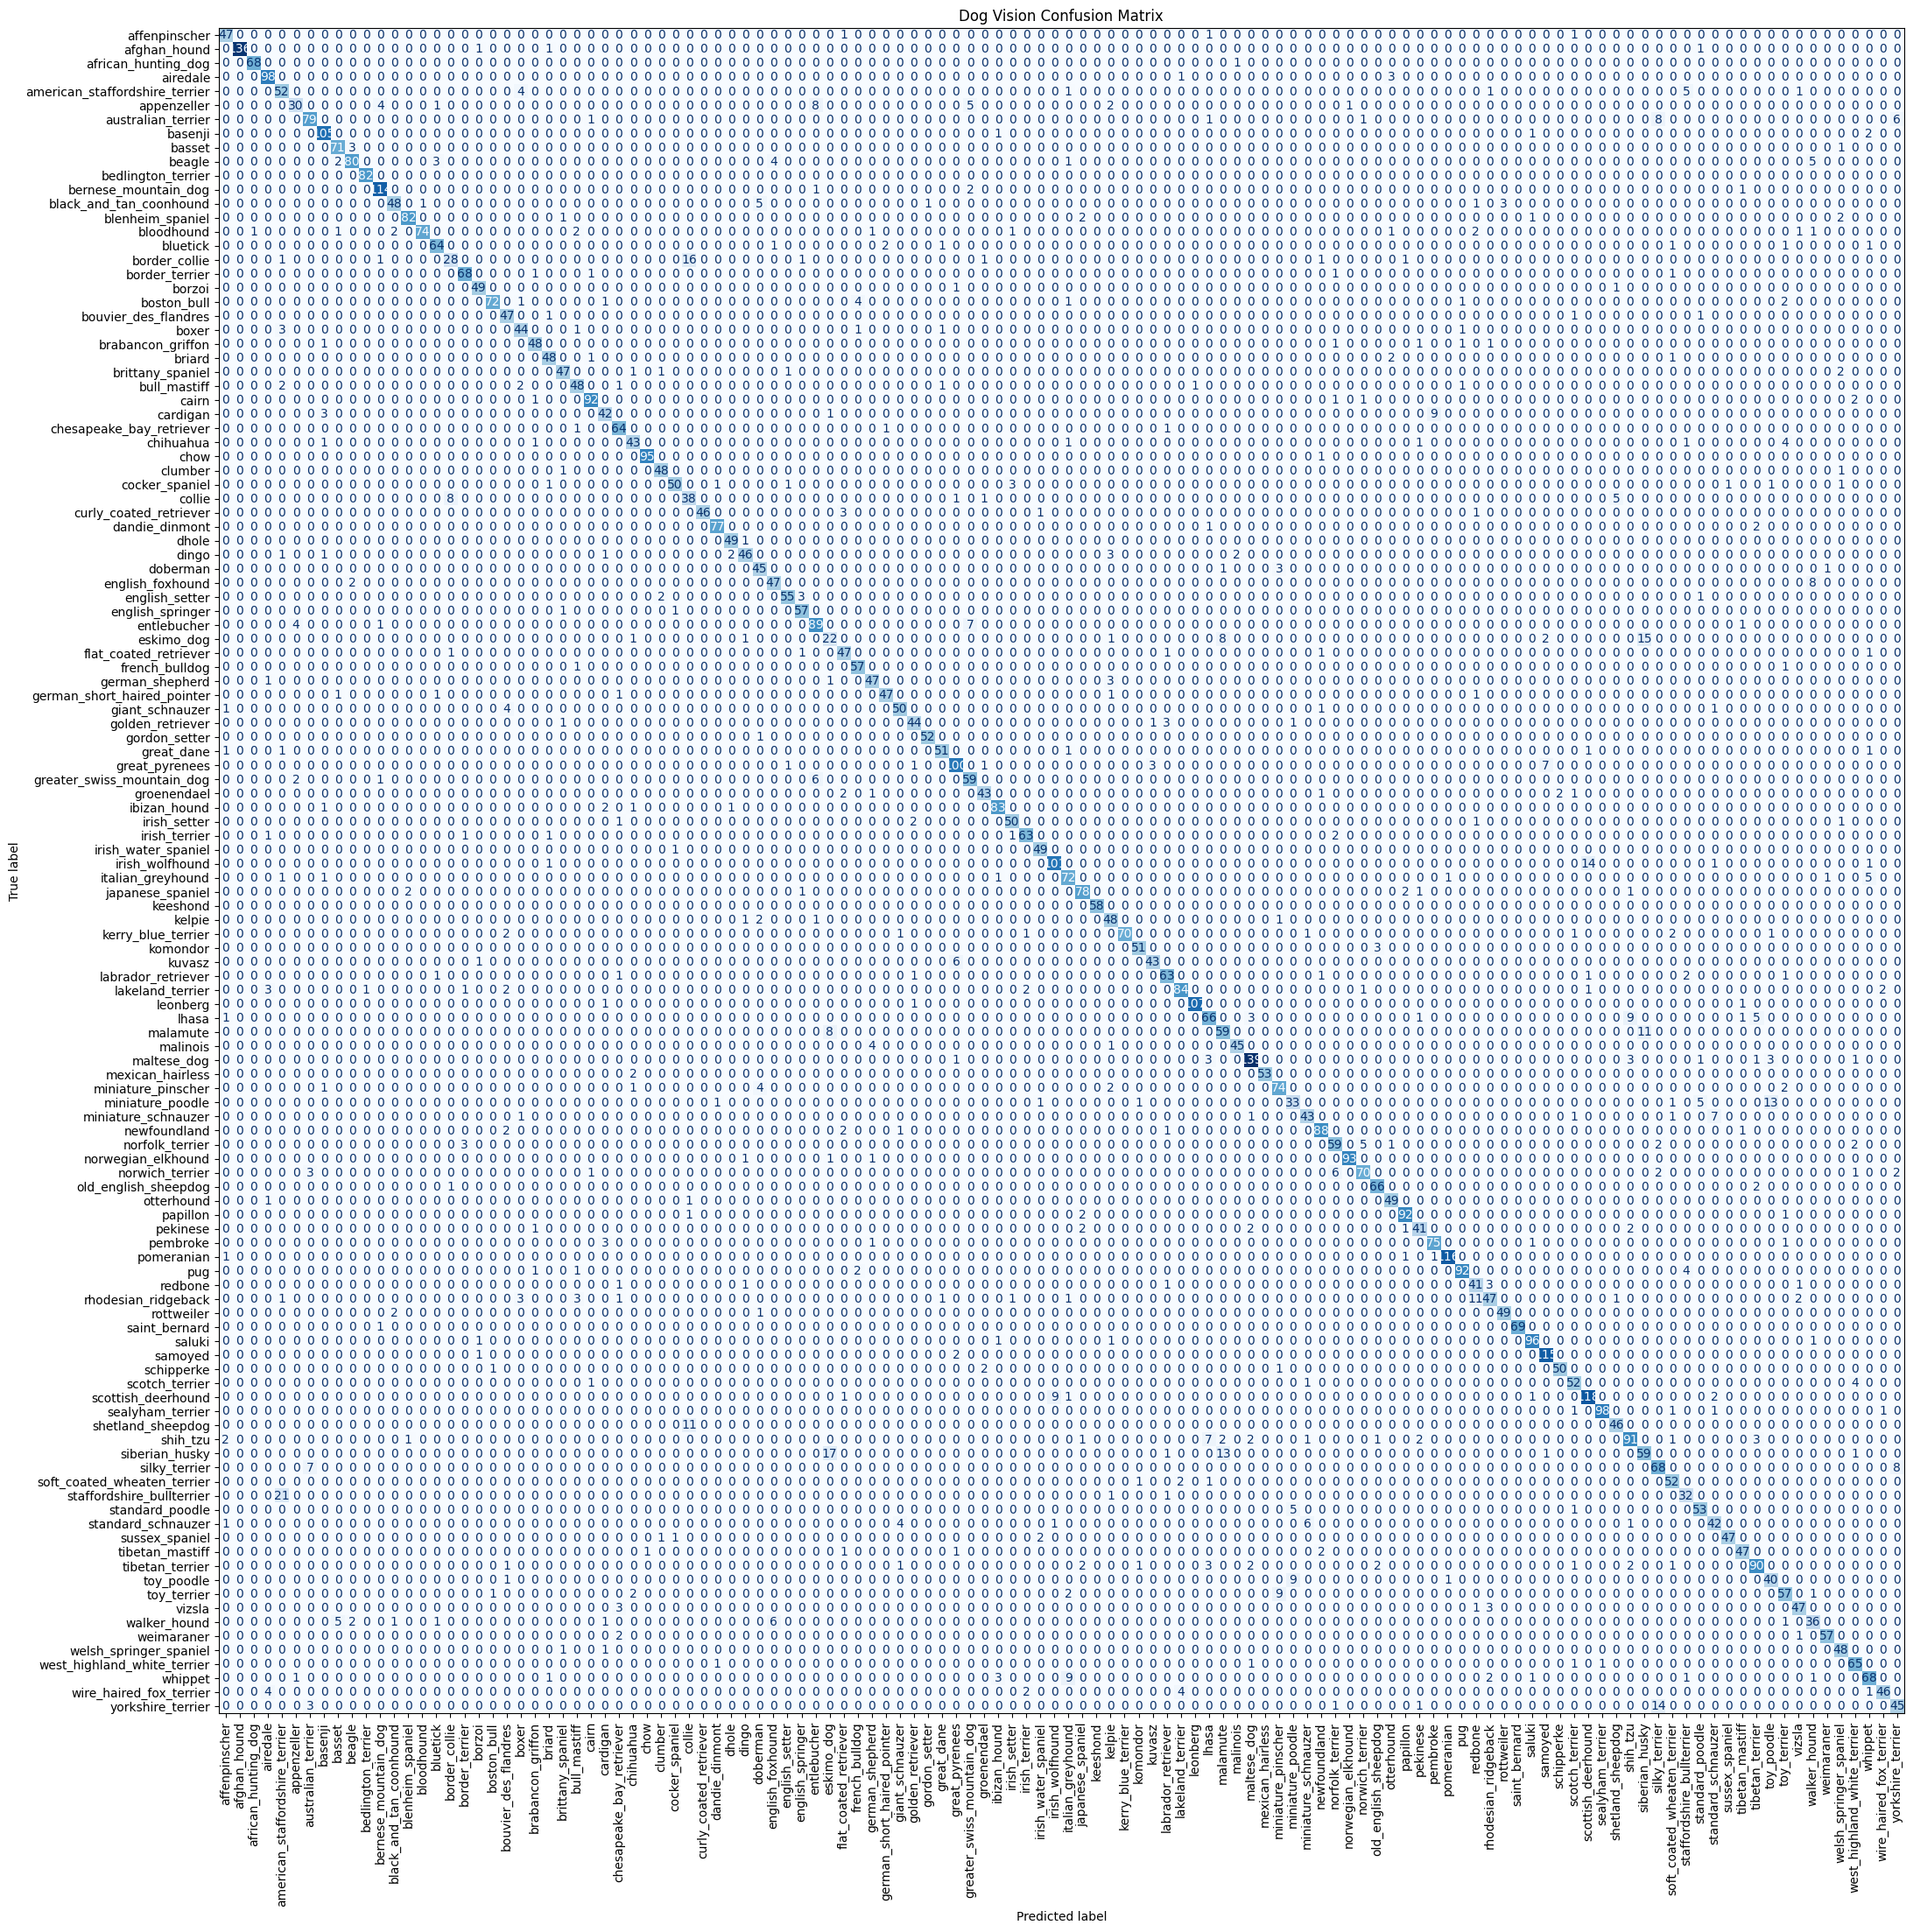

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(25, 25))
confusion_matrix_dog_preds = confusion_matrix(y_true=test_ds_labels,
                                              y_pred=test_preds_labels)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dog_preds,
                                                  display_labels=class_names)

# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.plot
ax.set_title("Dog Vision Confusion Matrix")
confusion_matrix_display.plot(xticks_rotation="vertical",
                              cmap="Blues",
                              colorbar=False,
                              ax=ax);

## TK - Save and load the best model

See here: https://www.tensorflow.org/tutorials/keras/save_and_load#new_high-level_keras_format

> TK **Note:** You may also see the "SavedModel" format as well as ".hdf5" formats...

In [ ]:
# Save the model to .keras
model_1.save("dog_vision_model.keras")

In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model("dog_vision_model.keras")

# Evaluate the loaded model
loaded_model_results = loaded_model.evaluate(test_ds)

269/269 [==============================] - 10s 26ms/step - loss: 0.3711 - accuracy: 0.8787


In [ ]:
assert model_1_results == loaded_model_results

## TK - Make predictions on custom images with the best model

In [ ]:
# TK - load custom image(s)
!wget -nc https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/images/dog-photos.zip
!unzip dog-photos.zip

--2023-10-26 03:02:51--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/images/dog-photos.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/images/dog-photos.zip [following]
--2023-10-26 03:02:51--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/images/dog-photos.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1091355 (1.0M) [application/zip]
Saving to: ‘dog-photos.zip’

dog-photos.zip      100%[===================>]   1.04M  --.-KB/s    in 0.02s   

2023-10-26 03:02:52 (51.5 MB/s) - ‘dog-photos.zip’ saved [1091355/1091

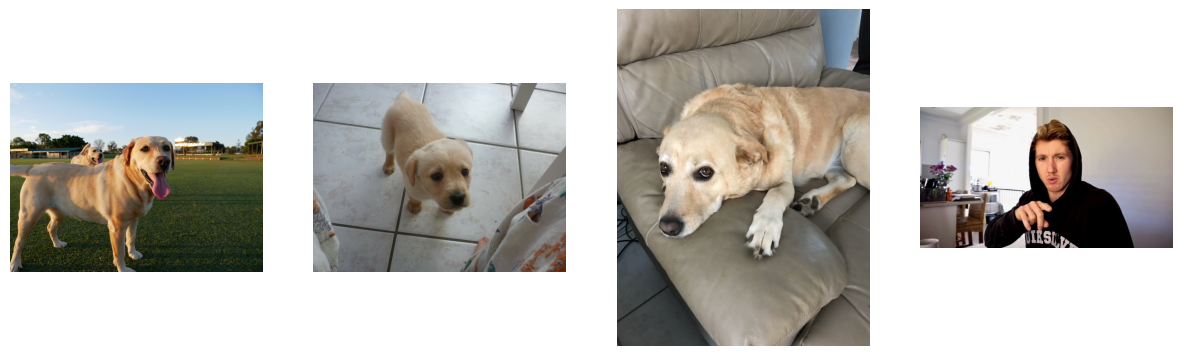

In [ ]:
# View images
custom_image_paths = ["dog-photo-1.jpeg",
                      "dog-photo-2.jpeg",
                      "dog-photo-3.jpeg",
                      "dog-photo-4.jpeg"]

fig, axes = plt.subplots(1, 4, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(plt.imread(custom_image_paths[i]))
  ax.axis("off")

# def plot_10_random_images_from_path_list(path_list: list):
#     fig, axes = plt.subplots(2, 5, figsize=(20, 10))
#     samples = random.sample(path_list, 10)
#     for i, ax in enumerate(axes.flatten()):
#         sample_path = samples[i]
#         sample_title = sample_path.parent.stem
#         ax.imshow(plt.imread(sample_path))
#         ax.set_title(sample_title)
#         ax.axis("off")

In [ ]:
# This will error...
loaded_model.predict("dog-photo-1.jpeg")

IndexError: ignored

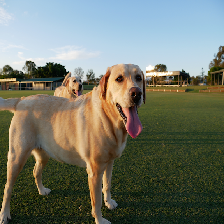

In [ ]:
# Model needs to make predictions on images in same format it was trained on

# Load the image (into PIL format)
custom_image = tf.keras.utils.load_img(
  path="dog-photo-1.jpeg",
  color_mode="rgb",
  target_size=(img_size, img_size),
)

custom_image

In [ ]:
# Turn the image into a tensor
custom_image_tensor = tf.keras.utils.img_to_array(custom_image)
custom_image_tensor.shape

(224, 224, 3)

In [ ]:
loaded_model.predict(custom_image_tensor)

ValueError: ignored

In [ ]:
pred_probs = loaded_model.predict(tf.expand_dims(custom_image_tensor, axis=0))
# pred_probs = tf.keras.activations.softmax(tf.constant(pred_probs)) # if you have no activation="softmax" in your model
class_names[tf.argmax(pred_probs, axis=-1).numpy()[0]]

1/1 [==============================] - 2s 2s/step


'labrador_retriever'

In [ ]:
tf.expand_dims(custom_image_tensor, axis=0).shape

TensorShape([1, 224, 224, 3])

> **Note:** TK - In the case of some models you may need to rescale your values here, in our case the Rescaling layer is built-in to the model.


In [ ]:
def pred_on_custom_image(image_path,
                         model,
                         target_size=img_size,
                         class_names=class_names,
                         plot=True):

  # Prepare and load image
  custom_image = tf.keras.utils.load_img(
    path=image_path,
    color_mode="rgb",
    target_size=(target_size, target_size),
  )

  # Turn the image into a tensor
  custom_image_tensor = tf.keras.utils.img_to_array(custom_image)

  # Add a batch dimension to the target tensor (e.g. (224, 224, 3) -> (1, 224, 224, 3))
  custom_image_tensor = tf.expand_dims(custom_image_tensor, axis=0)

  # Make a prediction with the target model
  pred_probs = model.predict(custom_image_tensor)
  # pred_probs = tf.keras.activations.softmax(tf.constant(pred_probs))
  pred_class = class_names[tf.argmax(pred_probs, axis=-1).numpy()[0]]

  # Plot if we want
  if not plot:
    return pred_class
  else:
    plt.figure(figsize=(5, 3))
    plt.imshow(plt.imread(image_path))
    plt.title(pred_class)
    plt.axis("off")

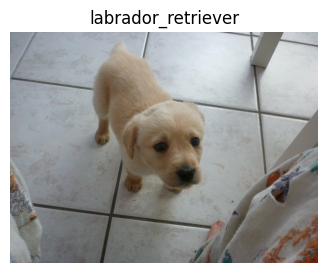

In [ ]:
pred_on_custom_image(image_path="dog-photo-2.jpeg", model=loaded_model)

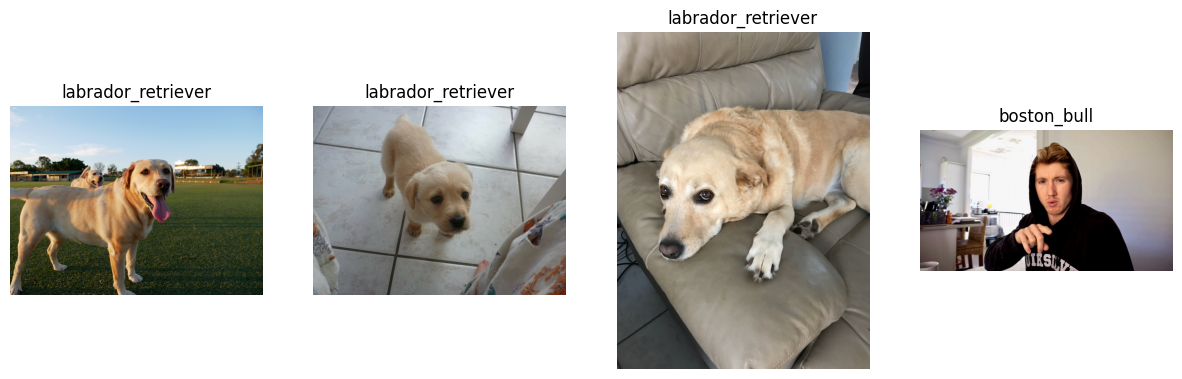

In [ ]:
# Predict on multiple images
fig, axes = plt.subplots(1, 4, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  image_path = custom_image_paths[i]
  pred_class = pred_on_custom_image(image_path=image_path,
                                    model=loaded_model,
                                    plot=False)
  ax.imshow(plt.imread(image_path))
  ax.set_title(pred_class)
  ax.axis("off")

## TK - Extensions & Exercises

* Create a machine learning app with Gradio to predict on images of dogs - https://www.gradio.app/
* Try a prediction on your own images of dogs and see if the model is correct
* Train a model on your own custom set of image classes, for example, apple vs banana vs orange
* More callbacks -
* Data augmentation -
* Other models - see tf.keras.applications or Kaggle Models
* ZTM TensorFlow course -
  * See further fine-tuning here
  * See videos on my YouTube for a more comprehensive TensorFlow overview to get started

### TK - Try data augmentation

See: https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.2),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation"
)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(img_size, img_size, 3),
    include_preprocessing=True
)

# base_model.summary()

# Freeze the base model
base_model.trainable = False

# TK - functionize this

# Create new model
inputs = tf.keras.Input(shape=(224, 224, 3))

# TK - Create data augmentation
x = data_augmentation(inputs)

# Craft model
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes,
                                name="output_layer",
                                activation="softmax")(x) # Note: If you have "softmax" activation, use from_logits=False in loss function
model_2 = tf.keras.Model(inputs, outputs, name="model_2")
model_2.summary()